<a href="https://colab.research.google.com/github/Diogod00/Lab2/blob/DiogoDantas/Lab2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory Session 2 -- Assignment

To be delivered until 2021-12-20 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

**2.a)** Load the dataset "auto.csv" 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

auto = pd.read_csv("auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**2.b)** Perform a simple linear regression considering *mpg* as the response and *horsepower* as the predictor. Given the results, comment on the following statements:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = auto['horsepower'].values.reshape(-1, 1)  
Y = auto['mpg'].values.reshape(-1, 1)  

regr = LinearRegression()
regr.fit(X,Y)
print('mpg = {:.4f} + {:.4f} * horsepower'.format(regr.intercept_[0], regr.coef_[0][0]))

mpg_pred = regr.predict(X)
r2_value = r2_score(y, mpg_pred)
print('R^2: {:.4f}'.format(r2_value))

mpg = 39.9359 + -0.1578 * horsepower
R^2: 0.6059


    i) Are the predictor and response statistically related?

    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

    iii) Is the relationship between the predictor and response positive or negative?

    iv) What is the predicted value of mpg when the horsepower is 98?

**2.c)** Plot a scatter plot of the response and predictor, along with the regression line.

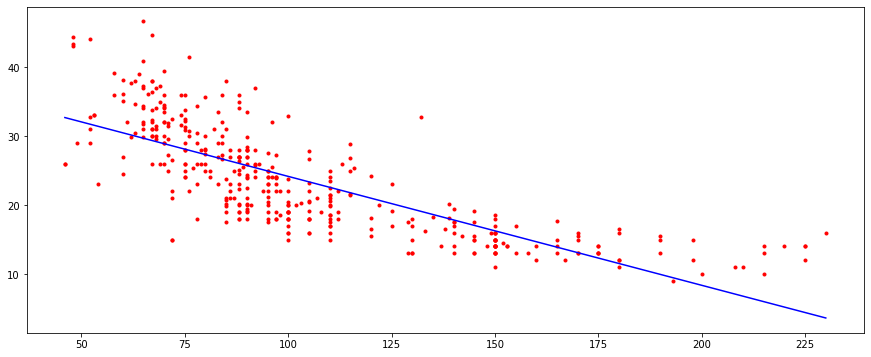

In [ ]:
limits_horsepower = np.array([min(X), max(X)])
mpg_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_horsepower

plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(auto['horsepower'], auto['mpg'], '.r')
plt.plot(limits_horsepower, mpg_vals, 'b-')
plt.show()

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

Quando se menciona 1-nearest neighbors, assumimos que **K=1** (o dataset irá dividir-se em 1 parte). Isto significa que este método irá escolher a amostra de treino mais próxima da nossa amostra de teste para validação. Visto que a nossa amostra de teste se encontra no dataset de treino, tendo em conta que apenas temos uma parte, o vizinho mais próximo será o prórprio dado. Podemos então assumir que o **erro de treino** quando K=1 é de **0%**. 

Para a classificação de novas observações, interessa-nos o error test, visto que é este que está associado ao erro médio proveniente da predição da resposta a estes novos dados. 

Do enunciado tiramos que para o método de 1-nearest neighbors temos uma média entre teste e treino de 18%, e sendo o erro de treino 0%, conclui-se que o **erro de teste** é então **36%**. Sendo este superior a 30%, que é a taxa de erro de teste usando logistic regression, pode-se dizer que o método preferencial para classificar novas observações neste caso é o **logistic regression**.

**4.a)** Load the dataset "auto.csv"

In [8]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px

auto = pd.read_csv("auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**4.b)** Create a new column, "mpg01", that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [11]:
array1 = auto.values 
mediana = np.median([array1[:,0]], axis=1)
mgp01 = mediana
# Comparação dos valores de mgp com a sua mediana
raw_target = array1[:,0]
aux1 = np.where( raw_target >= mgp01, 1, 0)
aux2= pd.DataFrame(aux1,columns=['mgp01'])
result1 = np.concatenate((auto, aux2), axis=1)

matrix1=pd.DataFrame(result1,columns=['mgp','cylinders','displacement','horsepower','weight','accelaration','year','origin','name','mgp01'])
matrix1

,mgp,cylinders,displacement,horsepower,weight,accelaration,year,origin,name,mgp01
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu,0
1,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
2,18,8,318,150,3436,11,70,1,plymouth satellite,0
3,16,8,304,150,3433,12,70,1,amc rebel sst,0
4,17,8,302,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27,4,140,86,2790,15.6,82,1,ford mustang gl,1
388,44,4,97,52,2130,24.6,82,2,vw pickup,1
389,32,4,135,84,2295,11.6,82,1,dodge rampage,1
390,28,4,120,79,2625,18.6,82,1,ford ranger,1


**4.c)** Do a scatterplot matrix between the columns to evaluate which other features seem most likely to be useful in predicting mpg01. Consider dropping the columns origin and name as they are categorical. Describe your findings.

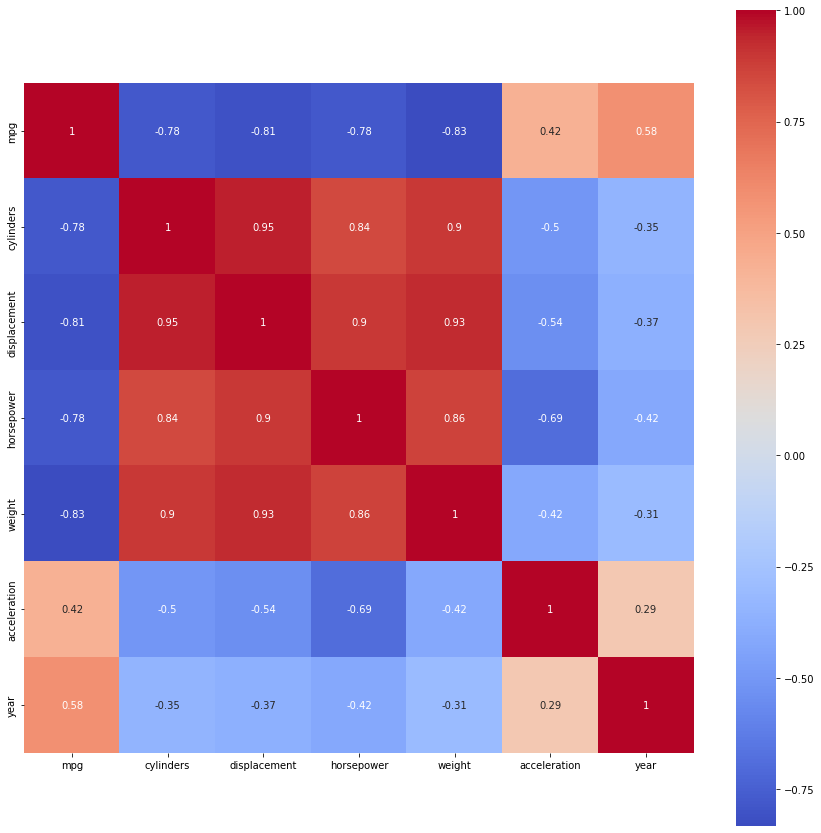

In [12]:
fig = px.scatter_matrix(matrix1, dimensions=['mgp','cylinders','displacement','horsepower','weight','accelaration','year'], color="mgp01") # remove underscore
#    labels={col:col.replace('_', ' ') for col in df.columns}
fig.update_traces(diagonal_visible=False)
fig.show()

## Import pearsonr function from scipy -- calculate the correlation and p-value between two columns
from scipy.stats import pearsonr

## Calculate the correlations between the columns
df = auto.drop(columns= ['name','origin'])
auto_corrs = df.corr(method='pearson')

## Calculate the p-value, as the second element of the response from the pearsonr function. 
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1])

## Plot the correlation matrix using seaborn's heatmap function
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(auto_corrs, square = True, cmap = 'coolwarm', annot = True)

#plt.rcParams['figure.figsize'] = [15, 6]
#plt.plot(df['lstat'], df['medv'], '.r')
#plt.show()

**4.d)** Drop the "name" and the "mpg" columns (the original mpg, not the mpg01). Create two new columns named "origin1" and "origin2". The first takes the value 1 when column origin is 1, and 0 otherwise; the second takes the value 1 when the column origin is 2 and 0 otherwise. Then, drop column origin.

In [13]:
array = matrix1.values 

# 
raw_target = array[:,7]
aux3 = np.where( raw_target == 1, 1, 0)
aux4= pd.DataFrame(aux3,columns=['origin1'])
result2 = np.concatenate((matrix1, aux4), axis=1)

# 
raw_target = array[:,7]
aux5 = np.where( raw_target == 2, 1, 0)
aux6 = pd.DataFrame(aux5,columns=['origin2'])
result3 = np.concatenate((result2, aux6), axis=1)

result4=np.delete(result3, np.s_[8], axis=1)
result5=np.delete(result4, np.s_[7], axis=1) 
result6=np.delete(result5, np.s_[0], axis=1) 

end=pd.DataFrame(result6,columns=['cylinders','displacement','horsepower','weight','accelaration','year','mgp01','origin1','origin2'])
end

,cylinders,displacement,horsepower,weight,accelaration,year,mgp01,origin1,origin2
0,8,307,130,3504,12,70,0,1,0
1,8,350,165,3693,11.5,70,0,1,0
2,8,318,150,3436,11,70,0,1,0
3,8,304,150,3433,12,70,0,1,0
4,8,302,140,3449,10.5,70,0,1,0
...,...,...,...,...,...,...,...,...,...
387,4,140,86,2790,15.6,82,1,1,0
388,4,97,52,2130,24.6,82,1,0,1
389,4,135,84,2295,11.6,82,1,1,0
390,4,120,79,2625,18.6,82,1,1,0


**4.e)** Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [14]:
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

end_array= end.to_numpy()
X = end_array[:,0:5]
y = end_array[:,6]
y=y.astype('int')
X=X.astype('int')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=10)
    
print ('Dimensions of X_train: ', X_train.shape)
print ('Dimensions of X_test:  ', X_test.shape)
print ('Dimensions of y_train: ', y_train.shape)
print ('Dimensions of y_test:  ', y_test.shape)

Dimensions of X_train:  (274, 5)
Dimensions of X_test:   (118, 5)
Dimensions of y_train:  (274,)
Dimensions of y_test:   (118,)


**4.f)** Perform LDA on the training data in order to predict mpg01 using the remaining variables. What is the test error of the model obtained?

In [16]:
# Apply a Logistic Regression model
model = LinearRegression()
model.fit(X_train,y_train)

## To calculate the R^2 score, the prediction of y is calculate using the predict method.
y_pred = model.predict(X_test)
r2_value = r2_score(y_test,y_pred)
print('R^2: {:.4f}'.format(r2_value))

R^2: 0.4837


**4.g)** Perform QDA on the training data in order to predict mpg01 using the remaining variables. What is the test error of the model obtained?

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Apply the polynomial transformation to the input dataset -- consider 2nd degree and without interaction
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_train_poli = poly.fit_transform(X_train)

# Fit the linear model
regr = LinearRegression()
regr.fit(X_train_poli, y_train)

# Calculate and print the R^2 score
X_test_poli = poly.fit_transform(X_test)
y2 = regr.predict(X_test_poli)
r2_value = r2_score(y_test, y2)
print('R^2: {:.4f}'.format(r2_value))


R^2: 0.4651


**4.h)** Perform logistic regression on the training data in order to predict mpg01 using the remaining variables. What is the test error of the model obtained?

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

lg = LogisticRegression()
lg.fit(X_train, y_train)
mpg01_lgpredic = lg.predict(X_test)
r2_lg_value = r2_score (y_test, mpg01_lgpredic)
print('R^2: {:.5f}'.format(r2_lg_value))

R^2: 0.47941


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**4.i)** Perform naive Bayes on the training data in order to predict mpg01 using the remaining variables. What is the test error of the model obtained?

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
mpg01_nb_pred = gnb.fit(X_train, y_train).predict(X_test)
r2_nb_value = r2_score (y_test, mpg01_nb_pred)
print('R^2: {:.5f}'.format(r2_nb_value))

R^2: 0.54882


**4.j)** Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables "displacement", "horsepower", and "weight". What test errors are obtained? Which value of K seems to perform the best on this data set?

In [23]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)
mpg01_k_pred = neigh.predict(X_test)
r2_k_value = r2_score (y_test, mpg01_k_pred)
print('R^2: {:.5f}'.format(r2_k_value))

R^2: 0.75706


**4.k)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

In [24]:
from sklearn import metrics

auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC da LDA é', auc)

auc = metrics.roc_auc_score(y_test, y2)
print('AUC da QDA é', auc)

auc = metrics.roc_auc_score(y_test, mpg01_lgpredic)
print('AUC da Reressáo Logistica é', auc)

auc = metrics.roc_auc_score(y_test, mpg01_nb_pred)
print('AUC de Naive Bayes é', auc)

auc = metrics.roc_auc_score(y_test, mpg01_k_pred)
print('AUC de Naive Bayes é', auc)

AUC da LDA é 0.913235294117647
AUC da QDA é 0.9197058823529412
AUC da Reressáo Logistica é 0.8791176470588236
AUC de Naive Bayes é 0.896470588235294
AUC de Naive Bayes é 0.9299999999999999


## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how k-fold cross-validation is implemented

Obtendo os dados, dividimos os mesmos aleatoriamente em K partes aproximadamente do mesmo tamanho. De seguida admitimos que a primeira parte como validation data e introduzimos o modelo nas restantes k-1 partes. Calcula-se o mean square error (MSE) nas observações das k-1 partes. Depois repetimos o processo k vezes de forma a que todas as partes sejam vistas como validation data, calculando para cada o MSE. No final calcula-se o k-fold cross validation através da equação apresentada nas teóricas.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.

*   Vantagens: Validation Set Approach é altamente variável porque depende do tipo de observações que serão incluidas nos dados de treino e nos dados de validação. Neste método apenas uma parte das observações (dados de treino) é usada. Visto que os métodos estatísticos têm melhores respostas quando maior for o número de dados observados (o que não acontece neste caso) o erro de validação terá a tendência de estimar em excesso o erro de teste em todo o dataset.
*   Desvantagens: Validation Set Approach é mais simples e fácil de modelar.
2. Leave One Out Cross-Validation (LOOCV)

*   Vantagens:  LOOCV tem uma variância muito alta, porque ao analisar-se quase todos os dados de treino apenas numa observação iremos obter muitos dados sobrepostos. Isto provoca um aumento na correlação com a estimativa do erro de teste e por consequência um maior desvio do valor médio do erro.


*   Desvantagens: LOOCV tem menor tendência a estimar em demasia, devido a cada conjunto de dados de treino conter n-1 observações. O que signfica que estaremos a usar quase todos os dados de treino em apenas uma validação.

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

**8)** Enter your GitHub repository webpage.